In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
import warnings
warnings.filterwarnings('ignore')

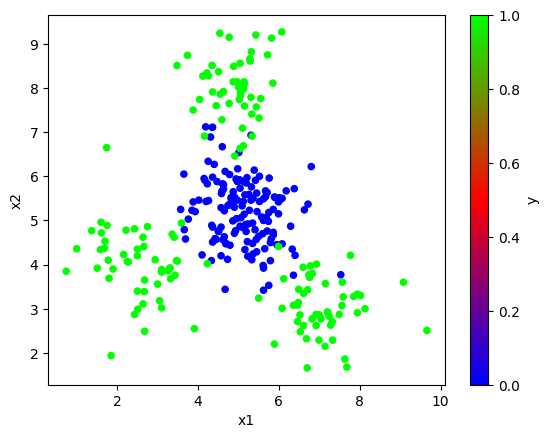

In [81]:
data = pd.read_csv('./data/multiple2.txt', header=None,names=['x1', 'x2', 'y'])
data.plot.scatter(x='x1', y='x2',c='y',cmap='brg')
plt.show()

**整理数据集，拆分测试集训练集**

In [82]:
import sklearn.model_selection as ms
import sklearn.svm as svm
x, y = data.iloc[:,:-1], data['y']
train_x,test_x,train_y,test_y = ms.train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=7)
# 构建模型
model = svm.SVC(kernel='linear')  # SVM线性核函数
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

# 分类报告
import sklearn.metrics as sm
result = sm.classification_report(test_y, pred_y)
print(result)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        37
           1       1.00      0.42      0.59        38

    accuracy                           0.71        75
   macro avg       0.81      0.71      0.68        75
weighted avg       0.82      0.71      0.68        75



**暴力绘制分类边界线**

In [83]:
# 从x的min-max拆分100个x坐标
# 从y的min-max拆分100个y坐标
# 预测每个坐标点的类别标签，绘制散点

xs = np.linspace(data['x1'].min(), data['x1'].max(), 100)
ys = np.linspace(data['x2'].min(), data['x2'].max(), 100)

points = []
for x in xs:
    for y in ys:
        points.append([x, y])
        
points = np.array(points)
points.shape 

(10000, 2)

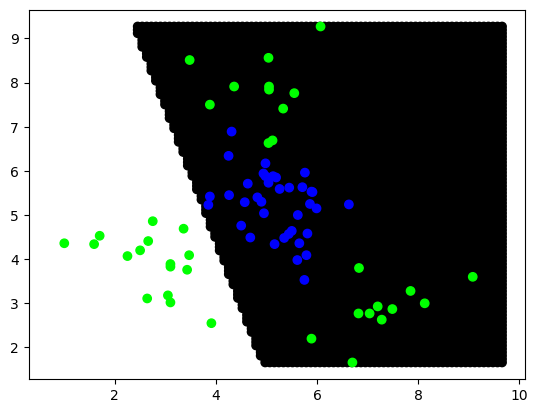

In [84]:
# 预测每个坐标点的类别标签，绘制散点
points_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=points_labels,cmap='gray')

# 绘制测试样本
plt.scatter(test_x['x1'],test_x['x2'],c=test_y,cmap='brg')
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.89      0.84      0.86        38

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



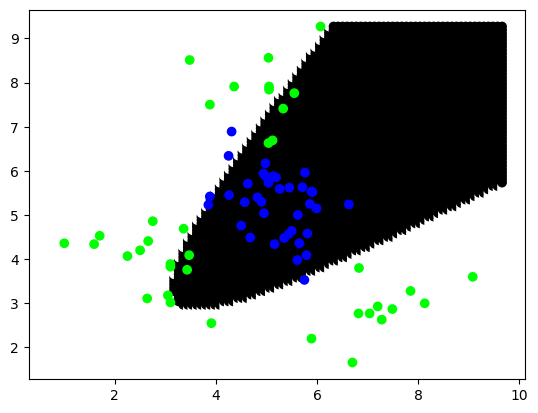

In [85]:
# 构建模型
model = svm.SVC(kernel='poly', degree=3)  # SVM多项式核函数
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

# 分类报告
import sklearn.metrics as sm
result = sm.classification_report(test_y, pred_y)
print(result)

points_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=points_labels,cmap='gray')

# 绘制测试样本
plt.scatter(test_x['x1'],test_x['x2'],c=test_y,cmap='brg')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.97      0.92      0.95        38

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



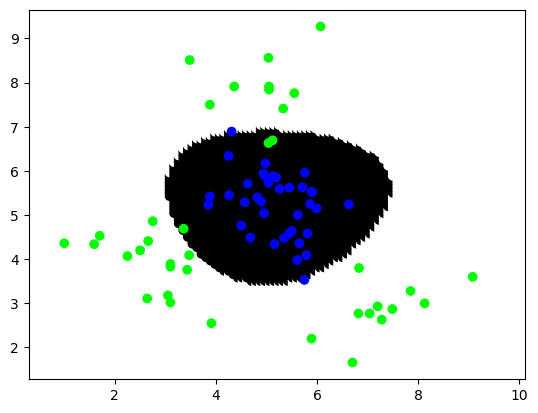

In [94]:
# 构建模型
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)  # SVM径向基核函数
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

# 分类报告
import sklearn.metrics as sm
result = sm.classification_report(test_y, pred_y)
print(result)

points_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=points_labels,cmap='gray')

# 绘制测试样本
plt.scatter(test_x['x1'],test_x['x2'],c=test_y,cmap='brg')
plt.show()

**通过网格搜索寻求最优超参数组合**

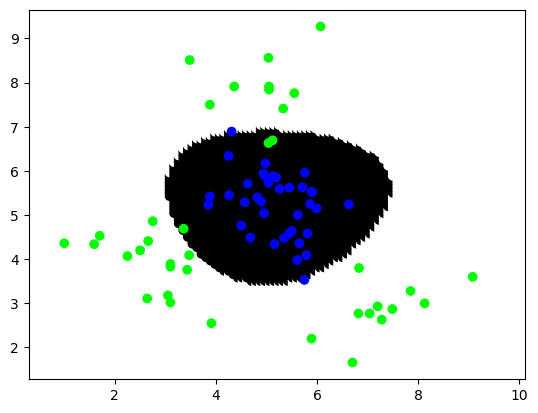

In [89]:
# 构建模型
model = svm.SVC()  

# 网格搜索
params = [{'kernel':['linear'], 'C':[1, 10, 100, 1000]},
          {'kernel':['poly'], 'degree':[2, 3]},
          {'kernel':['rbf'], 'C':[1, 10, 100], 'gamma':[1, 0.1, 0.01]}]
model = ms.GridSearchCV(model, params, cv=5)

model.fit(train_x, train_y)
pred_y = model.predict(test_x)

points_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=points_labels,cmap='gray')

# 绘制测试样本
plt.scatter(test_x['x1'],test_x['x2'],c=test_y,cmap='brg')
plt.show()

In [93]:
# 获取网格搜索每个参数组合
print(model.cv_results_['params'])
print('--'*30)
# 获取网格搜索每个参数组合所对应的平均测试分值
print(model.cv_results_['mean_test_score'])
print('--'*30)
# 获取最好的参数
print(model.best_params_)
print('--'*30)
print(model.best_score_)
print('--'*30)
print(model.best_estimator_)

[{'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 100, 'kernel': 'linear'}, {'C': 1000, 'kernel': 'linear'}, {'degree': 2, 'kernel': 'poly'}, {'degree': 3, 'kernel': 'poly'}, {'C': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 10, 'gamma': 1, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 100, 'gamma': 1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}]
------------------------------------------------------------
[0.67111111 0.66222222 0.66222222 0.66666667 0.86666667 0.88888889
 0.94222222 0.94666667 0.73777778 0.90666667 0.93333333 0.93333333
 0.88       0.92444444 0.94222222]
------------------------------------------------------------
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
------------------------------------------------------------
0.9466666666666667
---------------------